### Pythonサポートベクターマシンで回帰分析！SVRの概要と実装
(https://watlab-blog.com/2019/12/29/svr/) 

In [1]:
import numpy as np
from sklearn import svm
from matplotlib import pyplot as plt

# データを用意する------------------------------------------------------------------
a = 1.0                                                 # 直線の傾き
b = 0.5                                                 # y切片
x = np.arange(1.0, 8.0, 0.2)                            # 横軸を作成
noise = np.random.normal(loc=0, scale=0.5, size=len(x)) # ガウシアンノイズを生成
y = a * x + b + noise                                   # 学習用サンプル波形
# ----------------------------------------------------------------------------------

In [2]:
xx=x.reshape(-1,1)

y

array([1.71280501, 1.58941509, 2.89110809, 1.28687796, 2.24972894,
       2.6000641 , 2.94238314, 3.99816916, 2.23081238, 2.87928457,
       2.87992485, 3.23300226, 4.57045341, 3.80999105, 5.12790822,
       3.24884561, 4.6546131 , 5.02396956, 5.07415317, 5.73876561,
       5.3108411 , 5.92599573, 5.30608399, 6.5112325 , 5.71357278,
       6.61154688, 6.58835837, 6.58465431, 7.18652998, 6.91923682,
       7.06859525, 7.88178428, 8.34705651, 7.34043793, 8.24349174])

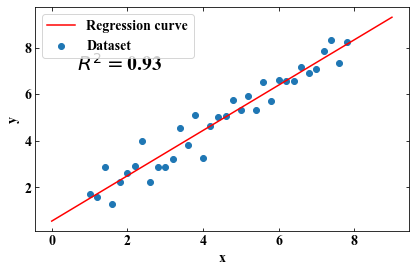

In [3]:

# サポートベクターマシンによる学習
model = svm.SVR(C=1.0, kernel='linear', epsilon=0.1)    # 正則化パラメータ=1, 線形カーネルを使用
model.fit(x.reshape(-1, 1), y)                          # フィッティング

# 学習済モデルを使って予測
x_reg = np.arange(0, 10, 1)                             # 回帰式のx軸を作成
y_reg = model.predict(x_reg.reshape(-1, 1))             # 予測
r2 = model.score(x.reshape(-1, 1), y)                   # 決定係数算出

# ここからグラフ描画---------------------------------------------------------------
# フォントの種類とサイズを設定する。
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'Times New Roman'

# 目盛を内側にする。
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

# グラフの上下左右に目盛線を付ける。
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')

# 軸のラベルを設定する。
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# データプロットの準備。
ax1.scatter(x, y, label='Dataset', lw=1, marker="o")
ax1.plot(x_reg, y_reg, label='Regression curve', color='red')
plt.legend()

# グラフ内に決定係数を記入
plt.text(0.5, 7, '$\ R^{2}=$' + str(round(r2, 2)), fontsize=20)

# レイアウト設定
fig.tight_layout()

# グラフを表示する。
plt.show()
plt.close()
# ---------------------------------------------------------------------------------

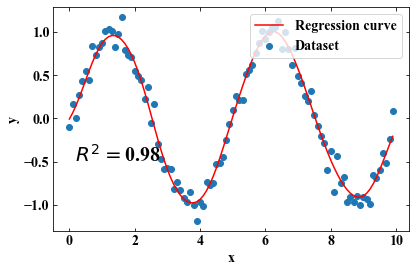

In [4]:
import numpy as np
from sklearn import svm
from matplotlib import pyplot as plt

# データを用意する------------------------------------------------------------------
x = np.arange(0.0, 10.0, 0.1)                           # 横軸を作成
noise = np.random.normal(loc=0, scale=0.1, size=len(x)) # ガウシアンノイズを生成
y = np.sin(2 * np.pi * 0.2 * x) + noise                 # 学習用サンプル波形
# ----------------------------------------------------------------------------------

# サポートベクターマシンによる学習
model = svm.SVR(C=1.0, kernel='rbf', epsilon=0.1, gamma='auto')    # RBFカーネルを使用
model.fit(x.reshape(-1, 1), y)                          # フィッティング

# 学習済モデルを使って予測
x_reg = np.arange(0, 10, 0.1)                           # 回帰式のx軸を作成
y_reg = model.predict(x_reg.reshape(-1, 1))             # 予測
r2 = model.score(x.reshape(-1, 1), y)                   # 決定係数算出

# ここからグラフ描画---------------------------------------------------------------
# フォントの種類とサイズを設定する。
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'Times New Roman'

# 目盛を内側にする。
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

# グラフの上下左右に目盛線を付ける。
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')

# 軸のラベルを設定する。
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# データプロットの準備。
ax1.scatter(x, y, label='Dataset', lw=1, marker="o")
ax1.plot(x_reg, y_reg, label='Regression curve', color='red')
plt.legend(loc='upper right')

# グラフ内に決定係数を記入
plt.text(0.0, -0.5, '$\ R^{2}=$' + str(round(r2, 2)), fontsize=20)

# レイアウト設定
fig.tight_layout()

# グラフを表示する。
plt.show()
plt.close()
# ---------------------------------------------------------------------------------

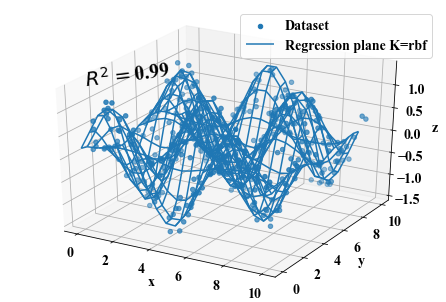

In [5]:
import numpy as np
from sklearn import svm
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# データを用意する------------------------------------------------------------------
x = np.random.uniform(0, 10, 500)                                # ノイズを含んだx軸を作成
y = np.random.uniform(0, 10, 500)                                # ノイズを含んだy軸を作成
z = np.sin(x) * np.cos(y) * np.random.uniform(1, 1.5, 500)       # ノイズを含んだz値を作成
X = np.c_[x, y]                                                  # SVRが使えるように変数を結合
# ---------------------------------------------------------------------------------

# サポートベクターマシンによる学習
model = svm.SVR(C=1.0, kernel='rbf', gamma='auto', epsilon=0.1)   # RBFカーネルを使用
model.fit(X, z)                                                   # フィッティング

# 学習済モデルを使って予測
grid_line = np.arange(0, 10, 0.5)                                 # 回帰式の軸を作成
X2, Y2 = np.meshgrid(grid_line, grid_line)                        # グリッドを作成
Z2 = model.predict(np.array([X2.ravel(), Y2.ravel()]).T)          # 予測
Z2 = Z2.reshape(X2.shape)                                         # プロット用にデータshapeを変換
r2 = model.score(X, z)                                            # 決定係数算出

# ここからグラフ描画----------------------------------------------------------------
# フォントの種類とサイズを設定する。
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'Times New Roman'

#  グラフの入れ物を用意する。
fig = plt.figure()
ax1 = Axes3D(fig)

# 軸のラベルを設定する。
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')

# データプロットする。
ax1.scatter3D(x, y, z, label='Dataset')
ax1.plot_wireframe(X2, Y2, Z2, label='Regression plane K=rbf')
plt.legend()

# グラフ内に決定係数を記入
ax1.text(0.0, 0.0, 1.5, zdir=(1,1,0), s='$\ R^{2}=$' + str(round(r2, 2)), fontsize=20)

# グラフを表示する。
plt.show()
plt.close()
# ---------------------------------------------------------------------------------

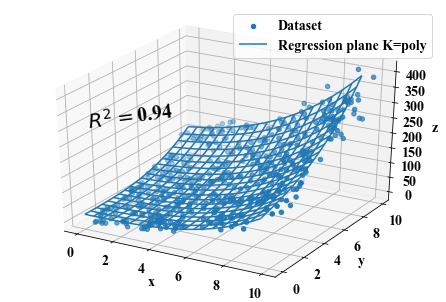

In [6]:
import numpy as np
from sklearn import svm
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# データを用意する------------------------------------------------------------------
x = np.random.uniform(0, 10, 500)                                 # ノイズを含んだx軸を作成
y = np.random.uniform(0, 10, 500)                                 # ノイズを含んだy軸を作成
z = (x ** 2 + y ** 2 + x * y) * np.random.uniform(1, 1.5, 500)    # ノイズを含んだz値を作成
X = np.c_[x, y]                                                   # SVRが使えるように変数を結合
# ---------------------------------------------------------------------------------

# サポートベクターマシンによる学習
model = svm.SVR(C=1.0, kernel='poly', gamma='auto', epsilon=0.1)  # 多項式カーネルを使用
model.fit(X, z)                                                   # フィッティング

# 学習済モデルを使って予測
grid_line = np.arange(0, 10, 0.5)                                 # 回帰式の軸を作成
X2, Y2 = np.meshgrid(grid_line, grid_line)                        # グリッドを作成
Z2 = model.predict(np.array([X2.ravel(), Y2.ravel()]).T)          # 予測
Z2 = Z2.reshape(X2.shape)                                         # プロット用にデータshapeを変換
r2 = model.score(X, z)                                            # 決定係数算出

# ここからグラフ描画----------------------------------------------------------------
# フォントの種類とサイズを設定する。
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'Times New Roman'

#  グラフの入れ物を用意する。
fig = plt.figure()
ax1 = Axes3D(fig)

# 軸のラベルを設定する。
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')

# データプロットする。
ax1.scatter3D(x, y, z, label='Dataset')
ax1.plot_wireframe(X2, Y2, Z2, label='Regression plane K=poly')
plt.legend()

# グラフ内に決定係数を記入
ax1.text(0.0, 0.0, 300, zdir=(1,1,0), s='$\ R^{2}=$' + str(round(r2, 2)), fontsize=20)

# グラフを表示する。
plt.show()
plt.close()
# ---------------------------------------------------------------------------------